#Libraries and data

In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/6. Association Rule Learning

/content/drive/MyDrive/Data Mining for Business in Python 2021/6. Association Rule Learning


In [ ]:
#import libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
#load data
dataset = pd.read_csv("restaurants-challenge.csv", header = None)
dataset.head()

,0,1,2
0,BROOKLYN,Chinese,Z
1,MANHATTAN,American,C
2,BRONX,Chicken,C
3,MANHATTAN,American,A
4,MANHATTAN,American,A


#Preparing transactions

In [ ]:
dataset.shape

(179731, 3)

In [ ]:
#List
transactions = []
for i in range ( 0, 179731):
  transactions.append([str(dataset.values[i,j])
                      for j in range (0,3)])
transactions[:5]

[[' BROOKLYN ', ' Chinese ', ' Z'],
 [' MANHATTAN ', ' American ', ' C'],
 [' BRONX ', ' Chicken ', ' C'],
 [' MANHATTAN ', ' American ', ' A'],
 [' MANHATTAN ', ' American ', ' A']]

In [ ]:
#encoding transaction list
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_transactions = te.fit_transform(transactions)
df = pd.DataFrame(te_transactions,
                  columns = te.columns_)
df.head()

,A,Afghan,African,American,Armenian,Asian,Australian,B,BRONX,BROOKLYN,Bagels/Pretzels,Bakery,Bangladeshi,Barbecue,Bottled beverages including water sodas juices etc.,Brazilian,C,Cafe/Coffee/Tea,Cajun,Caribbean,Chicken,Chinese,Chinese/Cuban,Chinese/Japanese,Continental,Creole,Creole/Cajun,Czech,Delicatessen,Donuts,Eastern European,Egyptian,English,Ethiopian,Filipino,French,Fruits/Vegetables,German,Greek,Hamburgers,...,Korean,Latin (Cuban Dominican Puerto Rican South & Central American),MANHATTAN,Mediterranean,Mexican,Middle Eastern,Moroccan,Not Listed/Not Applicable,Nuts/Confectionary,Other,P,Pakistani,Pancakes/Waffles,Peruvian,Pizza,Pizza/Italian,Polish,Polynesian,Portuguese,QUEENS,Russian,STATENISLAND,Salads,Sandwiches,Sandwiches/Salads/Mixed Buffet,Scandinavian,Seafood,Soul Food,Soups,Soups & Sandwiches,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,Z
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Association Rule LEarning

In [ ]:
#ARL
model = apriori(df, min_support=0.02, use_colnames=True)
results = association_rules(model,
                            metric = 'confidence',
                            min_threshold = 0.5)
results.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,( Italian ),( MANHATTAN ),0.047671,0.412644,0.029394,0.616597,1.494256,0.009723,1.531952
3,( Cafe/Coffee/Tea ),( A),0.032120,0.513078,0.022016,0.685432,1.335922,0.005536,1.547908
8,( American ),( MANHATTAN ),0.239163,0.412644,0.129866,0.543003,1.315911,0.031177,1.285251
14,"( B, American )",( MANHATTAN ),0.061208,0.412644,0.033227,0.542860,1.315563,0.007970,1.284848
11,"( A, American )",( MANHATTAN ),0.134401,0.412644,0.072642,0.540487,1.309812,0.017182,1.278213
7,( STATENISLAND ),( A),0.032326,0.513078,0.021026,0.650430,1.267703,0.004440,1.392919
0,( American ),( A),0.239163,0.513078,0.134401,0.561963,1.095279,0.011692,1.111602
12,"( MANHATTAN , American )",( A),0.129866,0.513078,0.072642,0.559359,1.090203,0.006010,1.105032
10,"( BROOKLYN , American )",( A),0.045329,0.513078,0.025238,0.556769,1.085156,0.001980,1.098575
13,"( QUEENS , American )",( A),0.040071,0.513078,0.022000,0.549014,1.070041,0.001440,1.079684


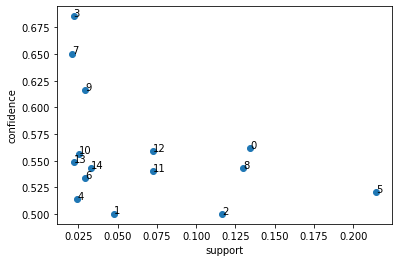

In [ ]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(results['support'],
            results['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
for i, label in enumerate(results.index):
  plt.annotate(label, (results['support'][i],
                       results['confidence'][i]))
plt.show()